In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy import interpolate
from IPython.display import clear_output

In [2]:
Nx = 2**6
Nt = 2**17
dx = 1/Nx
dt = 1/Nt
xx = np.arange(0,1+dx,dx)
tt = np.arange(0,1+dt,dt)
nu = 0.1
cfl = dt/(dx**2/2*nu)
print('CFL condition: '+str(cfl))
resolution = int(Nt/100)

k_list = [n for n in range(1,9)]
phi_list = [n*np.pi/4 for n in range(1,9)]

CFL condition: 0.625


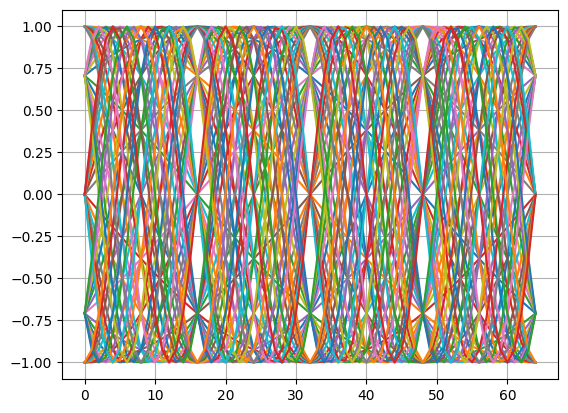

In [3]:
plt.figure()
plt.grid(True)
input_list = []
output_list = []
for k in k_list:
    for phi in phi_list:
        u0 = np.sin(k*np.pi*xx+phi)
        plt.plot(u0)
        uh = np.zeros((xx.shape[0],tt.shape[0]))
        uh[:,0] = u0
        for j in range(0, tt.shape[0]-1):
            for i in range(1, xx.shape[0]-1):
                uh[i,j+1] = uh[i,j] + nu*dt*(uh[i+1,j] - 2*uh[i,j] + uh[i-1,j])/(dx**2) - 0.5*dt*(uh[i,j]**2-uh[i-1,j]**2)/dx
            if np.mod(j,resolution)==0:
                input_list.append(uh[:,j])
                output_list.append(uh[:,j+1])

In [7]:
input = np.array(input_list)
output = np.array(output_list)

from sklearn.model_selection import train_test_split
input_train, input_test, output_train, output_test = train_test_split(input, output)

In [8]:
save_flag = False
# save_flag = True
if save_flag:
    np.save('../data/Burgers_time/input_train.npy', input_train)
    np.save('../data/Burgers_time/output_train.npy', output_train)
    np.save('../data/Burgers_time/input_test.npy', input_test)
    np.save('../data/Burgers_time/output_test.npy', output_test)
    print('dataset saved')

dataset saved
